## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [208]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [209]:
iris_data = pd.read_csv("Iris.csv")
iris_data.head(152)
#iris_data is the parent/root dataframe.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [210]:
# Check dimension of data
print("Shape of the dataframe is : "+str(iris_data.shape))

Shape of the dataframe is : (152, 6)


In [211]:
print("Column Names : \n")
print(np.array(iris_data.columns).reshape(-1,1))

Column Names : 

[['Id']
 ['SepalLengthCm']
 ['SepalWidthCm']
 ['PetalLengthCm']
 ['PetalWidthCm']
 ['Species']]


In [212]:
#Check data Type
print("Data Types: \n\n" + str(iris_data.dtypes))

Data Types: 

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [213]:
# Check for NaN/Null values
null_iris = iris_data.isnull()

### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

In [214]:
print(iris_data.describe())
seplen_mean = iris_data["SepalLengthCm"].median()
sepewid_mean = iris_data["SepalWidthCm"].median()
petlen_mean = iris_data["PetalLengthCm"].median()
petwid_mean = iris_data["PetalWidthCm"].median()
#Updating each column's NaN values with their respective mean(s)
#print(iris_data[np.isnan(iris_data.loc[:,"PetalWidthCm"])])
iris_data.loc[:,"PetalWidthCm"].replace(np.nan,petwid_mean, inplace = True)
#print(iris_data[np.isnan(iris_data.loc[:,"SepalLengthCm"])])
iris_data.loc[:,"SepalLengthCm"].replace(np.nan,seplen_mean, inplace = True)
#print(iris_data[np.isnan(iris_data.loc[:,"SepalWidthCm"])])
iris_data.loc[:,"SepalWidthCm"].replace(np.nan,sepewid_mean, inplace = True)
#print(iris_data[np.isnan(iris_data.loc[:,"PetalLengthCm"])])
iris_data.loc[:,"PetalLengthCm"].replace(np.nan,petlen_mean, inplace = True)


iris_data.describe()

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  152.000000     151.000000    150.000000     150.000000    151.000000
mean    76.500000       5.843709      3.054000       3.758667      1.202649
std     44.022721       0.825314      0.433594       1.764420      0.762185
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.750000       5.100000      2.800000       1.600000      0.300000
50%     76.500000       5.800000      3.000000       4.350000      1.300000
75%    114.250000       6.400000      3.300000       5.100000      1.800000
max    152.000000       7.900000      4.400000       6.900000      2.500000


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,5.843421,3.053289,3.766447,1.203289
std,44.022721,0.822584,0.430757,1.754000,0.759698
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [215]:
X = iris_data.drop(columns="Species")

df_species = pd.get_dummies(iris_data["Species"])

y = iris_data.pop("Species")

In [216]:
df_species

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [217]:
#Check the dataset
#print(y)
#df_new = pd.concat([df, df_sex], axis=1)
#df_new
x_new = pd.concat([X,df_species], axis=1)
print(x_new)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5           1.40           0.2   
1      2            4.9           3.0           1.40           0.2   
2      3            4.7           3.2           1.30           0.2   
3      4            4.6           3.1           1.50           0.2   
4      5            5.0           3.6           1.40           0.2   
5      6            5.4           3.9           1.70           0.4   
6      7            4.6           3.4           1.40           0.3   
7      8            5.0           3.4           1.50           0.2   
8      9            4.4           2.9           1.40           0.2   
9     10            4.9           3.1           1.50           0.1   
10    11            5.4           3.7           1.50           0.2   
11    12            4.8           3.4           1.60           0.2   
12    13            4.8           3.0           1.40           0.1   
13    14            

### Find the distribution of target variable (Class) (1 Marks)

In [218]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
freq = np.hstack((unique_elements.reshape(-1,1), counts_elements.reshape(-1,1)))
print(np.hstack((unique_elements.reshape(-1,1), counts_elements.reshape(-1,1))))

Frequency of unique values of the said array:
[['Iris-setosa' 50]
 ['Iris-versicolor' 50]
 ['Iris-virginica' 52]]


### Plot the distribution of target variable using histogram

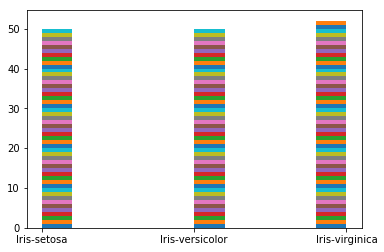

In [219]:
plt.hist(y,histtype = 'barstacked')
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023549D08AC8>,
      dtype=object)

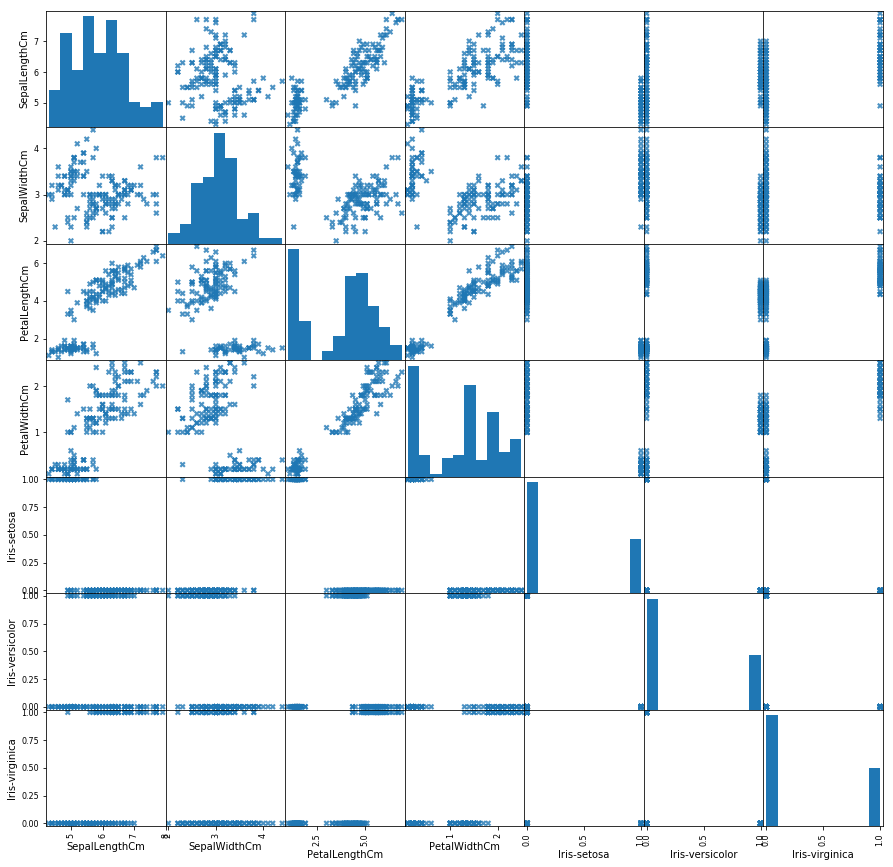

In [220]:
#Drop Id variable from data

x_new = x_new.drop(columns="Id")

pd.plotting.scatter_matrix(x_new, alpha=0.8,figsize=(15,15),marker = 'X',)

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

#### Conclusions

From the above scatter plots, and the histogramns, we can infer the following conslusions:
1. Peta Length and Petal Width, both have 2 class distributions in given range(from histograms of the variables).
2. Petal Length and the Petal width are following a strong positive correlation.
3. Sepal Width has a near to normal distribution of data.

### Correlation among all variables and give your insights (1 Marks)

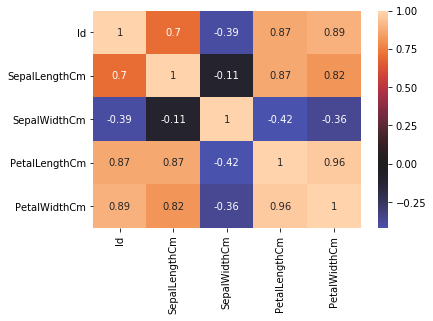

In [221]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
correlation = X.corr()
sns.heatmap(correlation,annot = True, center = 0)

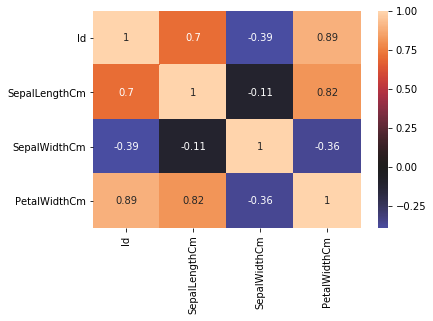

In [222]:
X = X.drop(columns="PetalLengthCm")
correlation1 = X.corr()
sns.heatmap(correlation1, annot = True, center = 0)

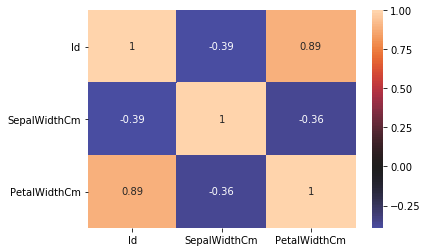

In [223]:
X = X.drop(columns="SepalLengthCm")
correlation2 = X.corr()
sns.heatmap(correlation2, annot = True, center = 0)

### Split data in Training and Validation in 80:20 (1 Marks)

In [224]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=10)

### Do Feature Scaling ( 1 Marks)

In [225]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(X_train.head(10))
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
#X_train_std = {"SepalWidthCm":X_train_std[:,0],"PetalWidthCm":X_train_std[:,1]}
X_train_std = pd.DataFrame(data = {"SepalWidthCm":X_train_std[:,0],"PetalWidthCm":X_train_std[:,1]})
X_train_std.head(10)
#scaler1 = StandardScaler()
#scaler1.fit(y_train)
#y_train.std = scaler.transform(y_train)

,SepalWidthCm,PetalWidthCm
0,-0.340912,-2.437556
1,-0.911298,0.331874
2,0.640153,-0.360484
3,0.959569,1.716588
4,-0.204019,-0.129698
5,-0.728775,1.024231
6,-0.842852,-0.129698
7,-0.135573,-1.283627
8,1.050831,-0.591269
9,0.845492,-0.129698


### Train and Fit NaiveBayes Model(2 Marks)

In [226]:
#Fit the model

In [227]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

GNB = clf.fit(X_train_std, y_train)

In [228]:
X['prob'] = pd.DataFrame(GNB.predict_proba(X_train_std))[1]

In [229]:
X.head(100)
#Predict

,Id,SepalWidthCm,PetalWidthCm,prob
0,1,3.5,0.2,9.976040e-01
1,2,3.0,0.2,1.639662e-02
2,3,3.2,0.2,2.793815e-01
3,4,3.1,0.2,5.796355e-03
4,5,3.6,0.2,9.865099e-01
5,6,3.9,0.4,1.548802e-02
6,7,3.4,0.3,8.856100e-02
7,8,3.4,0.2,9.987989e-01
8,9,2.9,0.2,8.691824e-03
9,10,3.1,0.1,4.102058e-02


### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [230]:
# show Confusion Matrix

In [231]:
# show accuracy

In [232]:
#Show precision and Recall metrics

## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [233]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [234]:
iris_knn = pd.read_csv("Iris.csv")
iris_knn.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [235]:
print(iris_knn.describe())
seplen_mean = iris_knn["SepalLengthCm"].median()
sepewid_mean = iris_knn["SepalWidthCm"].median()
petlen_mean = iris_knn["PetalLengthCm"].median()
petwid_mean = iris_knn["PetalWidthCm"].median()
#Updating each column's NaN values with their respective mean(s)
#print(iris_data[np.isnan(iris_data.loc[:,"PetalWidthCm"])])
iris_knn.loc[:,"PetalWidthCm"].replace(np.nan,petwid_mean, inplace = True)
#print(iris_data[np.isnan(iris_data.loc[:,"SepalLengthCm"])])
iris_knn.loc[:,"SepalLengthCm"].replace(np.nan,seplen_mean, inplace = True)
#print(iris_data[np.isnan(iris_data.loc[:,"SepalWidthCm"])])
iris_knn.loc[:,"SepalWidthCm"].replace(np.nan,sepewid_mean, inplace = True)
#print(iris_data[np.isnan(iris_data.loc[:,"PetalLengthCm"])])
iris_knn.loc[:,"PetalLengthCm"].replace(np.nan,petlen_mean, inplace = True)


iris_knn.describe()

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  152.000000     151.000000    150.000000     150.000000    151.000000
mean    76.500000       5.843709      3.054000       3.758667      1.202649
std     44.022721       0.825314      0.433594       1.764420      0.762185
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.750000       5.100000      2.800000       1.600000      0.300000
50%     76.500000       5.800000      3.000000       4.350000      1.300000
75%    114.250000       6.400000      3.300000       5.100000      1.800000
max    152.000000       7.900000      4.400000       6.900000      2.500000


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,5.843421,3.053289,3.766447,1.203289
std,44.022721,0.822584,0.430757,1.754000,0.759698
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [236]:
species = np.unique(iris_knn.loc[:,"Species"])
print(len(iris_knn.loc[:,"Species"]))
for i in range(len(iris_knn.loc[:,"Species"])):
    if iris_knn.iloc[i,-1] == species[0]:
        iris_knn.iloc[i,-1] = 0
    elif iris_knn.iloc[i,-1] == species[1]:
        iris_knn.iloc[i,-1] = 1
    elif iris_knn.iloc[i,-1] == species[2]:
        iris_knn.iloc[i,-1] = 2

152


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.702734     -0.392693       0.872346   
SepalLengthCm  0.702734       1.000000     -0.109369       0.871120   
SepalWidthCm  -0.392693      -0.109369      1.000000      -0.420713   
PetalLengthCm  0.872346       0.871120     -0.420713       1.000000   
PetalWidthCm   0.890676       0.815986     -0.356510       0.962043   
Species        0.942753       0.775061     -0.417318       0.944477   

               PetalWidthCm   Species  
Id                 0.890676  0.942753  
SepalLengthCm      0.815986  0.775061  
SepalWidthCm      -0.356510 -0.417318  
PetalLengthCm      0.962043  0.944477  
PetalWidthCm       1.000000  0.952513  
Species            0.952513  1.000000  


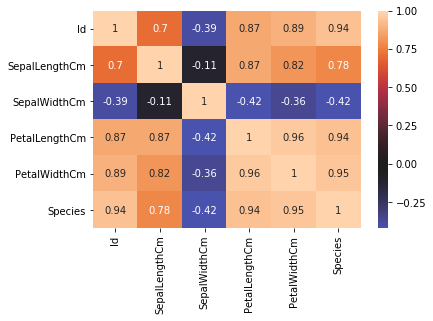

In [237]:
correlation = iris_knn.corr()
print(correlation)
sns.heatmap(correlation, annot = True, center = 0)

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [238]:
iris_knn.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

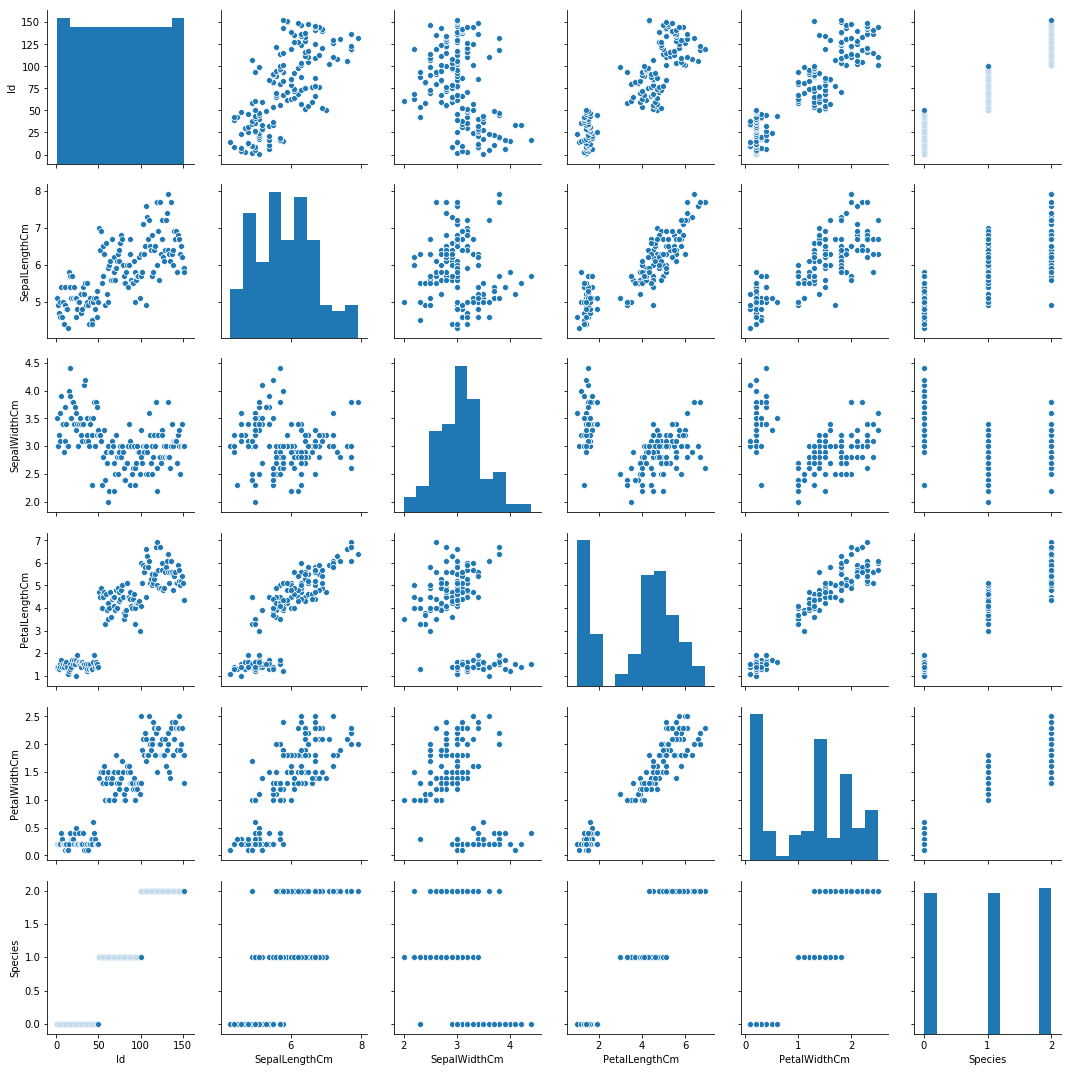

In [239]:
sns.pairplot(iris_knn)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [240]:
#print(iris_knn.columns)
iris_knn.drop(columns = "Id", inplace=True)

In [241]:
X = iris_knn.drop(columns = "Species")
y = iris_knn.pop("Species")

In [242]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8, random_state = 10)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [243]:
#from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [244]:
#sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)

In [245]:
score = accuracy_score(y_test, y_pred)
print("for k=5, Score : "+str(score))

for k=5, Score : 0.9354838709677419


In [246]:
classifier1 = KNeighborsClassifier(n_neighbors=3)  
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)
score1 = accuracy_score(y_test, y_pred1)
print("for k=3, Score : "+str(score1))

for k=3, Score : 0.9354838709677419


In [247]:
classifier2 = KNeighborsClassifier(n_neighbors=9)  
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
score2 = accuracy_score(y_test, y_pred2)
print("for k=9, Score : "+str(score2))

for k=9, Score : 0.9354838709677419


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*